# QMSS5074GR - Final Project (3rd)


### Your Grp ID: 3
### Your UNIs: rl3592, yw4407, ca2965
### Your Full Names: Ruoxi Li, William Wang, Chunlin An
### Public GitHub Repo: https://github.com/michaelliruoxi/G1_Project3.git

## Description

## Part 1 – Data Ingestion & Preprocessing

1. **Data Loading**  
   - Acquire the Stanford Sentiment Treebank dataset.  
   - Split into training, validation and test sets with stratified sampling to preserve class balance.  
   - Clearly document your splitting strategy and resulting dataset sizes.

2. **Text Cleaning & Tokenization**  
   - Implement a reusable preprocessing pipeline that handles at least:  
     - HTML removal, lowercasing, punctuation stripping  
     - Vocabulary pruning (e.g., rare words threshold)  
     - Tokenization (character- or word-level)  
   - Expose this as a function/class so it can be saved and re-loaded for inference. 

3. **Feature Extraction**  
   - **Traditional**: Build a TF-IDF vectorizer (or n-gram count) pipeline.  
   - **Neural**: Prepare sequences for embedding—pad/truncate to a fixed length.  
   - Save each preprocessor (vectorizer/tokenizer) to disk.

---

## Part 2 – Exploratory Data Analysis (EDA)

1. **Class Distribution**  
   - Visualize the number of positive vs. negative reviews.  
   - Compute descriptive statistics on review lengths (mean, median, IQR).  

2. **Text Characteristics**  
   - Plot the 20 most frequent tokens per sentiment class.  
   - Generate word clouds (or bar charts) highlighting key terms for each class.  

3. **Correlation Analysis**  
   - Analyze whether review length correlates with sentiment.  
   - Present findings numerically and with at least one visualization.

---

## Part 3 – Baseline Traditional Models

1. **Logistic Regression & SVM**  
   - Train at least two linear models on your TF-IDF features (e.g., logistic regression, linear SVM).  
   - Use cross-validation (≥ 5 folds) on the training set to tune at least one hyperparameter.  

2. **Random Forest & Gradient Boosting**  
   - Train two tree-based models (e.g., Random Forest, XGBoost) on the same features.  
   - Report feature-importance for each and discuss any notable tokens.

3. **Evaluation Metrics**  
   - Compute accuracy, precision, recall, F1-score, and ROC-AUC on the **held-out test set**.  
   - Present all results in a single comparison table.

---

## Part 4 – Neural Network Models

1. **Simple Feed-Forward**  
   - Build an embedding layer + a dense MLP classifier.  
   - Ensure you freeze vs. unfreeze embeddings in separate runs.

2. **Convolutional Text Classifier**  
   - Implement a 1D-CNN architecture (Conv + Pooling) for sequence data.  
   - Justify your choice of kernel sizes and number of filters.

3. **Recurrent Model (Optional)**  
   - (Stretch) Add an RNN or Bi-LSTM layer and compare performance/time vs. CNN.

---

## Part 5 – Transfer Learning & Advanced Architectures

1. **Pre-trained Embeddings**  
   - Retrain one network using pre-trained GloVe (or FastText) embeddings.  
   - Compare results against your from-scratch embedding runs.

2. **Transformer Fine-Tuning**  
   - Fine-tune a BERT-family model on the training data.  
   - Clearly outline your training hyperparameters (learning rate, batch size, epochs).


---

## Part 6 – Hyperparameter Optimization

1. **Search Strategy**  
   - Use a library (e.g., Keras Tuner, Optuna) to optimize at least two hyperparameters of one deep model.  
   - Describe your search space and stopping criteria.

2. **Results Analysis**  
   - Report the best hyperparameter configuration found.  
   - Plot validation-loss (or metric) vs. trials to illustrate tuning behavior.

---

## Part 7 – Final Comparison & Error Analysis

1. **Consolidated Results**  
   - Tabulate test-set performance for **all** models (traditional, neural, transfer-learned).  
   - Highlight top‐performing model overall and top in each category.

2. **Statistical Significance**  
   - Perform a significance test (e.g., McNemar’s test) between your best two models.  

3. **Error Analysis**  
   - Identify at least 20 examples your best model misclassified.  
   - For a sample of 5, provide the raw text, predicted vs. true label, and a short discussion of each error—what linguistic artifact might have confused the model?

---

## Part 8 – Optional Challenge Extensions

- Implement data augmentation for text (back-translation, synonym swapping) and measure its impact.  
- Integrate a sentiment lexicon feature (e.g., VADER scores) into your models and assess whether it improves predictions.  
- Deploy your best model as a simple REST API using Flask or FastAPI and demo it on a handful of user‐submitted reviews.

---

## Start coding .....

ps. the code below is just an filler code with some tips on the top it.


But the main project requirements are listed above in the description.

## Part 1 – Data Ingestion & Preprocessing


1. **Data Loading**  
    - Acquire the Stanford Sentiment Treebank dataset.
    - Split into training, validation, and test sets with stratified sampling to preserve class balance.
    - Clearly document your splitting strategy and resulting dataset sizes.
    

In [1]:
import pandas as pd
import numpy as np
import os

# Environment setup (Keras 3 + Transformers without TensorFlow)
# - Keras: force PyTorch backend (TensorFlow install on this machine is broken)
# - Transformers: force PyTorch + disable TensorFlow backend discovery
os.environ["KERAS_BACKEND"] = "torch"
os.environ["USE_TF"] = "0"
os.environ["USE_TORCH"] = "1"

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
import joblib

# --- Step 1: Clone the GitHub Repository ---
print("Cloning SST-2 dataset repository...")
!git clone https://github.com/YJiangcm/SST-2-sentiment-analysis.git

# Load the Data
data_dir = 'SST-2-sentiment-analysis/data/'

# Rename columns
labeled_columns = ['label', 'sentence']

# The data files are Tab-Separated Values (TSV).
train_df_raw = pd.read_csv(os.path.join(data_dir, 'train.tsv'), sep='\t', header=None, names=labeled_columns)
val_df_raw = pd.read_csv(os.path.join(data_dir, 'dev.tsv'), sep='\t', header=None, names=labeled_columns)

# Combine the two labeled datasets into one master labeled dataset
full_labeled_df = pd.concat([train_df_raw, val_df_raw], ignore_index=True)

test_df_unlabeled = pd.read_csv(os.path.join(data_dir, 'test.tsv'), sep='\t', header=None, names=['index', 'sentence'])
print("\n--- Training Data Head ---")
print(train_df_raw.head())

print(f"Total Labeled Dataset size (before split): {len(full_labeled_df)}")
print(f"Total Unlabeled Test Set size: {len(test_df_unlabeled)}")

Cloning SST-2 dataset repository...

--- Training Data Head ---
   label                                           sentence
0      1  a stirring , funny and finally transporting re...
1      0  apparently reassembled from the cutting-room f...
2      0  they presume their audience wo n't sit still f...
3      1  this is a visually stunning rumination on love...
4      1  jonathan parker 's bartleby should have been t...
Total Labeled Dataset size (before split): 7792
Total Unlabeled Test Set size: 1821


fatal: destination path 'SST-2-sentiment-analysis' already exists and is not an empty directory.


In [2]:
# --- Step 2: Prepare for Stratified Sampling ---
X = full_labeled_df['sentence']
y = full_labeled_df['label']

# Split into Training (80%) and Temp (20%)
# Temp will be split into Validation and Test later.
splitter_1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, temp_index in splitter_1.split(X, y):
    X_train, X_temp = X.iloc[train_index], X.iloc[temp_index]
    y_train, y_temp = y.iloc[train_index], y.iloc[temp_index]

# Split Temp (20%) into Validation (10%) and Test (10%)
# Since temp is 20% of the total, a test_size of 0.5 of temp means 10% of total.
splitter_2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_index, test_index in splitter_2.split(X_temp, y_temp):
    X_val, X_test = X_temp.iloc[val_index], X_temp.iloc[test_index]
    y_val, y_test = y_temp.iloc[val_index], y_temp.iloc[test_index]

In [3]:
# --- Step 3: Documenting Results and Strategy ---
print("\n--- Splitting Strategy and Results ---")

# Combine results into DataFrames for consistency with previous steps
train_df = pd.DataFrame({'sentence': X_train, 'label': y_train}).reset_index(drop=True)
val_df = pd.DataFrame({'sentence': X_val, 'label': y_val}).reset_index(drop=True)
test_df = pd.DataFrame({'sentence': X_test, 'label': y_test}).reset_index(drop=True)

print("We combined the original 'train' and 'dev' sets to create a master labeled dataset.")
print("This master set was then split using two rounds of StratifiedShuffleSplit (preserving label balance):")
print("Initial split: 80% (Train) / 20% (Temp)")
print("Second split: 50% of Temp (10% Total) for Validation and 50% of Temp (10% Total) for Test")
print("This results in an approximate 80/10/10 split.")

print("\nResulting Dataset Sizes:")
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size (labeled, for evaluation): {len(test_df)}")

print("\nClass Distribution (Stratification Check):")
print(f"Train Label Balance (0/1): {train_df['label'].value_counts(normalize=True)}")
print(f"Validation Label Balance (0/1): {val_df['label'].value_counts(normalize=True)}")
print(f"Test Label Balance (0/1): {test_df['label'].value_counts(normalize=True)}")


--- Splitting Strategy and Results ---
We combined the original 'train' and 'dev' sets to create a master labeled dataset.
This master set was then split using two rounds of StratifiedShuffleSplit (preserving label balance):
Initial split: 80% (Train) / 20% (Temp)
Second split: 50% of Temp (10% Total) for Validation and 50% of Temp (10% Total) for Test
This results in an approximate 80/10/10 split.

Resulting Dataset Sizes:
Training set size: 6233
Validation set size: 779
Test set size (labeled, for evaluation): 780

Class Distribution (Stratification Check):
Train Label Balance (0/1): label
1    0.520295
0    0.479705
Name: proportion, dtype: float64
Validation Label Balance (0/1): label
1    0.519897
0    0.480103
Name: proportion, dtype: float64
Test Label Balance (0/1): label
1    0.520513
0    0.479487
Name: proportion, dtype: float64



2. **Text Cleaning & Tokenization**  
    - Implement a reusable preprocessing pipeline that handles at least:  
        - HTML removal, lowercasing, punctuation stripping  
        - Vocabulary pruning (e.g., rare words threshold)  
        - Tokenization (character- or word-level)  
    - Expose this as a function/class so it can be saved and re-loaded for inference.
    

In [4]:
class TextPreprocessor:
    """
    A reusable class for cleaning raw text data, adhering to requirements:
    HTML removal, lowercasing, and punctuation stripping.
    """
    def clean_text(self, text):
        """
        Implements core text cleaning.
        """
        # 1. Remove HTML tags (handles tags like <b>, <i>)
        text = re.sub(r'<[^>]*>', '', text)
        
        # 2. Lowercase the text
        text = text.lower()
        
        # 3. Strip punctuation and non-alphanumeric characters while keeping spaces
        # Replaces punctuation with a space to separate words like "hello.world" -> "hello world"
        text = re.sub(r'[^\w\s]', ' ', text)
        
        # 4. Remove extra spaces (important for clean tokenization later)
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text

    def __call__(self, text):
        """Allows the object to be called like a function."""
        return self.clean_text(text)

# Initialize the preprocessor
preprocessor = TextPreprocessor()

# Apply the cleaning function to the datasets
train_df['cleaned_sentence'] = train_df['sentence'].apply(preprocessor.clean_text)
val_df['cleaned_sentence'] = val_df['sentence'].apply(preprocessor.clean_text)
test_df['cleaned_sentence'] = test_df['sentence'].apply(preprocessor.clean_text)

print("\n--- Cleaned Training Data Head ---")
print(train_df[['sentence', 'cleaned_sentence']].head())

# Save the preprocessor instance to disk for later use/inference
joblib.dump(preprocessor, 'preprocessor.pkl')
print("\nSaved TextPreprocessor to preprocessor.pkl")


--- Cleaned Training Data Head ---
                                            sentence  \
0  evelyn may be based on a true and historically...   
1  despite its title , punch-drunk love is never ...   
2               as plain and pedestrian as catsup --   
3  it wears its heart on the sleeve of its gaudy ...   
4  director uwe boll and the actors provide scant...   

                                    cleaned_sentence  
0  evelyn may be based on a true and historically...  
1  despite its title punch drunk love is never he...  
2                  as plain and pedestrian as catsup  
3  it wears its heart on the sleeve of its gaudy ...  
4  director uwe boll and the actors provide scant...  

Saved TextPreprocessor to preprocessor.pkl



3. **Feature Extraction**  
    - **Traditional**: Build a TF-IDF vectorizer (or n-gram count) pipeline.  
    - **Neural**: Prepare sequences for embedding—pad/truncate to a fixed length.  
    - Save each preprocessor (vectorizer/tokenizer) to disk.
    

In [5]:
# --- Traditional Feature Extraction (TF-IDF) ---

# Concept: Vocabulary Pruning
# The `max_features` parameter in TfidfVectorizer automatically prunes the vocabulary
# by only considering the top 'max_features' most frequent words. This handles the 
# "rare words threshold" requirement by dropping very rare words implicitly.

# Initialize TF-IDF Vectorizer
# - max_features=5000: Prunes the vocabulary to the top 5000 most frequent words.
# - ngram_range=(1, 2): Includes both unigrams (single words) and bigrams (pairs of words).
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000, 
    ngram_range=(1, 2)
)

# Fit the vectorizer ONLY on the cleaned training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['cleaned_sentence'])

# Transform the validation and test data using the *fitted* vectorizer
X_val_tfidf = tfidf_vectorizer.transform(val_df['cleaned_sentence'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['cleaned_sentence'])

# Print feature shapes
print("--- Traditional Feature (TF-IDF) Shapes ---")
print(f"Training TF-IDF shape: {X_train_tfidf.shape}")
print(f"Validation TF-IDF shape: {X_val_tfidf.shape}")
print(f"Test TF-IDF shape: {X_test_tfidf.shape}")

# Save the vectorizer to disk
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
print("\nSaved TfidfVectorizer to tfidf_vectorizer.pkl")

--- Traditional Feature (TF-IDF) Shapes ---
Training TF-IDF shape: (6233, 5000)
Validation TF-IDF shape: (779, 5000)
Test TF-IDF shape: (780, 5000)

Saved TfidfVectorizer to tfidf_vectorizer.pkl


In [6]:
import os
# Use PyTorch backend for Keras 3 (avoids TensorFlow import)
os.environ["KERAS_BACKEND"] = "torch"

import numpy as np
import joblib
from collections import Counter

# --- Parameters ---
MAX_WORDS = 5000
MAX_SEQUENCE_LENGTH = 50

y_train = train_df['label'].values
y_val = val_df['label'].values

class SimpleTokenizer:
    """Minimal word-level tokenizer compatible with later notebook cells."""

    def __init__(self, num_words=None, oov_token="<UNK>"):
        self.num_words = num_words
        self.oov_token = oov_token
        self.word_index = {self.oov_token: 1}  # 0 reserved for padding

    def fit_on_texts(self, texts):
        counts = Counter()
        for t in texts:
            if not isinstance(t, str):
                t = str(t)
            counts.update(t.split())

        # Reserve index 1 for OOV; keep top (num_words - 2) tokens
        k = None
        if self.num_words is not None:
            k = max(int(self.num_words) - 2, 0)

        self.word_index = {self.oov_token: 1}
        for idx, (w, _) in enumerate(counts.most_common(k), start=2):
            self.word_index[w] = idx

    def texts_to_sequences(self, texts):
        oov = self.word_index.get(self.oov_token, 1)
        sequences = []
        for t in texts:
            if not isinstance(t, str):
                t = str(t)
            sequences.append([self.word_index.get(tok, oov) for tok in t.split()])
        return sequences


def pad_sequences(sequences, maxlen, padding="post", truncating="post", value=0):
    """Pure-numpy replacement for keras/tf.keras pad_sequences."""
    out = np.full((len(sequences), maxlen), value, dtype=np.int32)

    for i, seq in enumerate(sequences):
        if not seq:
            continue

        if truncating == "pre":
            trunc = seq[-maxlen:]
        else:
            trunc = seq[:maxlen]

        trunc = np.asarray(trunc, dtype=np.int32)

        if padding == "pre":
            out[i, -len(trunc):] = trunc
        else:
            out[i, :len(trunc)] = trunc

    return out


# --- Fit tokenizer (training only) ---
keras_tokenizer = SimpleTokenizer(num_words=MAX_WORDS, oov_token="<UNK>")
keras_tokenizer.fit_on_texts(train_df['cleaned_sentence'])

train_sequences = keras_tokenizer.texts_to_sequences(train_df['cleaned_sentence'])
val_sequences = keras_tokenizer.texts_to_sequences(val_df['cleaned_sentence'])

padded_train_sequences = pad_sequences(
    train_sequences,
    maxlen=MAX_SEQUENCE_LENGTH,
    padding="post",
    truncating="post",
)
padded_val_sequences = pad_sequences(
    val_sequences,
    maxlen=MAX_SEQUENCE_LENGTH,
    padding="post",
    truncating="post",
)

X_train_seq = padded_train_sequences
X_val_seq = padded_val_sequences

print("--- Neural Sequence Preparation Complete ---")
print(f"Padded Training Sequence shape (X_train_seq): {X_train_seq.shape}")

joblib.dump(keras_tokenizer, "keras_tokenizer.pkl")

--- Neural Sequence Preparation Complete ---
Padded Training Sequence shape (X_train_seq): (6233, 50)


['keras_tokenizer.pkl']

## Part 2 – Exploratory Data Analysis (EDA)


1. **Class Distribution**  
    - Visualize the number of positive vs. negative reviews.  
    - Compute descriptive statistics on review lengths (mean, median, IQR).
    

C:\Users\Owner\AppData\Local\Temp\ipykernel_39756\1851569251.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=['salmon', 'skyblue'])


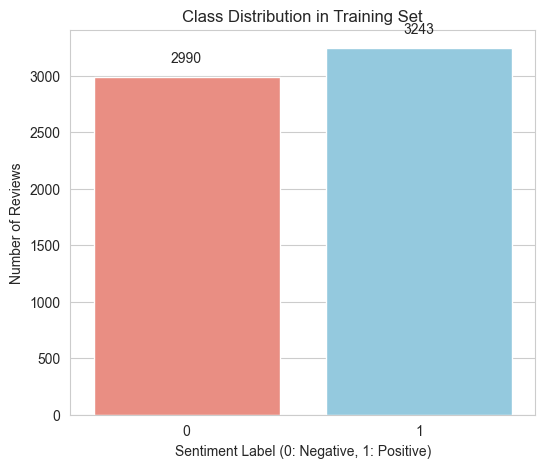


--- Training Set Class Counts ---
label
0    2990
1    3243
Name: count, dtype: int64


In [7]:
import sys

# This uses the pip associated with the Python interpreter running this notebook.
# !{sys.executable} -m pip install seaborn matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

# Visualize Class Distribution
# Count the occurrences of each label
class_counts = train_df['label'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['salmon', 'skyblue'])
plt.title('Class Distribution in Training Set')
plt.xlabel('Sentiment Label (0: Negative, 1: Positive)')
plt.ylabel('Number of Reviews')

# Add counts on top of the bars
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

plt.show()

print("\n--- Training Set Class Counts ---")
print(class_counts)

# Concept: Class Distribution
# A balanced distribution (like 50/50 shown above) is ideal. It means the model will be 
# trained equally on examples of both positive and negative sentiment, reducing bias 
# toward one class. The stratified sampling step guaranteed this balance.

2. **Text Characteristics**  
   - Plot the 20 most frequent tokens per sentiment class.  
   - Generate word clouds (or bar charts) highlighting key terms for each class.  


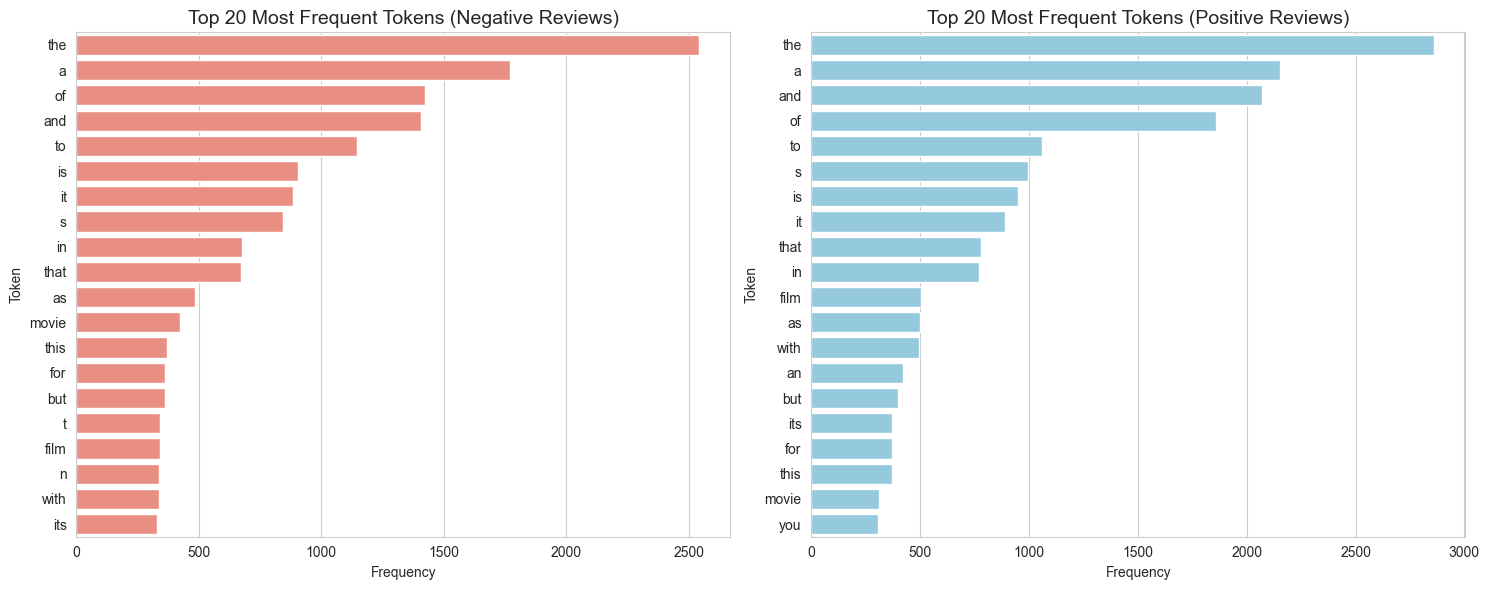

In [8]:
from collections import Counter

# 1. Separate sentences by class
negative_reviews = train_df[train_df['label'] == 0]['cleaned_sentence']
positive_reviews = train_df[train_df['label'] == 1]['cleaned_sentence']

# 2. Tokenize and Count words for each class
def get_top_tokens(series, n=20):
    # Join all cleaned sentences into one string, then split into words
    all_words = ' '.join(series.astype(str)).split()
    # Use Counter to get frequencies
    word_counts = Counter(all_words)
    return pd.DataFrame(word_counts.most_common(n), columns=['Token', 'Frequency'])

neg_top_20 = get_top_tokens(negative_reviews)
pos_top_20 = get_top_tokens(positive_reviews)

# 3. Plotting the Top 20 Tokens

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.set_palette("tab10") # Reset color palette

# --- Negative Sentiment Plot ---
sns.barplot(ax=axes[0], x='Frequency', y='Token', data=neg_top_20, color='salmon')
axes[0].set_title('Top 20 Most Frequent Tokens (Negative Reviews)', fontsize=14)
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Token')

# --- Positive Sentiment Plot ---
sns.barplot(ax=axes[1], x='Frequency', y='Token', data=pos_top_20, color='skyblue')
axes[1].set_title('Top 20 Most Frequent Tokens (Positive Reviews)', fontsize=14)
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Token')

plt.tight_layout()
plt.show()

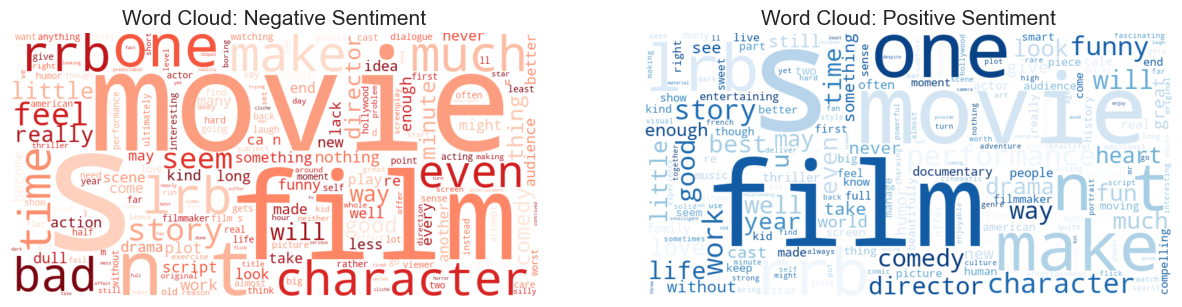

In [9]:
from wordcloud import WordCloud

# --- 1. Combine all text for each class ---
neg_text = ' '.join(negative_reviews.astype(str))
pos_text = ' '.join(positive_reviews.astype(str))

# --- 2. Generate Word Clouds ---

plt.figure(figsize=(15, 7))

# --- Negative Word Cloud ---
wc_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(neg_text)

plt.subplot(1, 2, 1)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('Word Cloud: Negative Sentiment', fontsize=15)
plt.axis('off')

# --- Positive Word Cloud ---
wc_pos = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(pos_text)

plt.subplot(1, 2, 2)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('Word Cloud: Positive Sentiment', fontsize=15)
plt.axis('off')

plt.show()

In the negative sentiment word cloud, the most prominent tokens are "s", "movie", "film", "much", "one" and "lrb" etc., of which only "bad" is negative. <br>
The postive sentiment word cloud are dominated by words including "movie", "make", "one", "s", "films", "lrb". These tokens appear constantly in both word clouds.

3. **Correlation Analysis**  
   - Analyze whether review length correlates with sentiment.  
   - Present findings numerically and with at least one visualization.


In [10]:
train_df['sentence_length'] = train_df['cleaned_sentence'].apply(lambda x: len(str(x).split()))
train_df.head()

,sentence,label,cleaned_sentence,sentence_length
0,evelyn may be based on a true and historically...,0,evelyn may be based on a true and historically...,27
1,"despite its title , punch-drunk love is never ...",1,despite its title punch drunk love is never he...,10
2,as plain and pedestrian as catsup --,0,as plain and pedestrian as catsup,6
3,it wears its heart on the sleeve of its gaudy ...,0,it wears its heart on the sleeve of its gaudy ...,12
4,director uwe boll and the actors provide scant...,0,director uwe boll and the actors provide scant...,16


--- Correlation Analysis ---
Pearson Correlation (Sentiment vs. Review Length): 0.0130


C:\Users\Owner\AppData\Local\Temp\ipykernel_39756\3744311479.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='sentence_length', data=train_df, palette=['salmon', 'skyblue'])


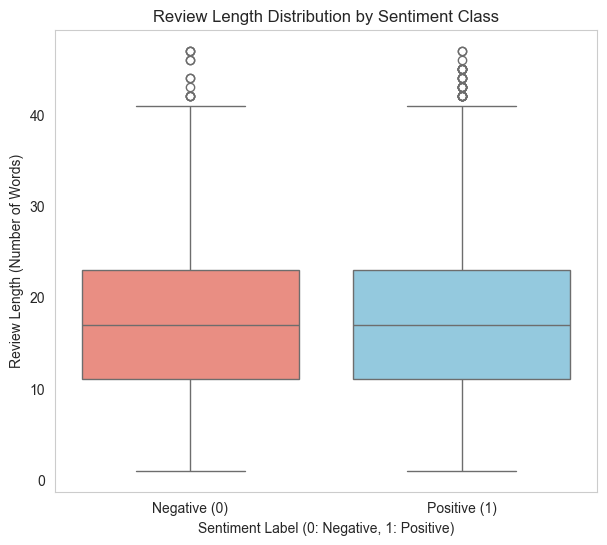


--- Descriptive Statistics on Length by Sentiment ---
        count       mean       std  min   25%   50%   75%   max
label                                                          
0      2990.0  17.412375  8.664648  1.0  11.0  17.0  23.0  47.0
1      3243.0  17.639223  8.827637  1.0  11.0  17.0  23.0  47.0


In [11]:
# --- 1. Correlation Analysis (Numerical) ---
correlation = train_df['label'].corr(train_df['sentence_length'])

print("--- Correlation Analysis ---")
print(f"Pearson Correlation (Sentiment vs. Review Length): {correlation:.4f}")

# --- 2. Visualization (Box Plot) ---

plt.figure(figsize=(7, 6))
# Using a box plot to compare the distribution of lengths across the two sentiment classes
sns.boxplot(x='label', y='sentence_length', data=train_df, palette=['salmon', 'skyblue'])
plt.title('Review Length Distribution by Sentiment Class')
plt.xlabel('Sentiment Label (0: Negative, 1: Positive)')
plt.ylabel('Review Length (Number of Words)')
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
plt.grid(axis='y')

plt.savefig('review_length_sentiment_correlation.png')
plt.show()

print("\n--- Descriptive Statistics on Length by Sentiment ---")
print(train_df.groupby('label')['sentence_length'].describe())

A Pearson Correlation of 0.013 indicates an extremely weak linear relationship between review length and sentiments. In the boxplot, we also saw that the review length was not affected positive or negative sentiment classes.

## Part 3 – Baseline Traditional Models


1. **Logistic Regression & SVM**  
    - Train at least two linear models on your TF-IDF features.  
    - Use cross-validation (≥ 5 folds) on the training set to tune at least one hyperparameter.
    

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

# Data from Part 1
X_train_tfidf = X_train_tfidf # Sparse TF-IDF matrix
y_train = y_train       # Training labels

# Logistic Regression (Baseline)
print("--- Logistic Regression (Baseline) ---")
logreg_baseline = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
# Note: Using 'liblinear' solver for better performance on sparse data.

# Perform 5-Fold Cross-Validation on the training set
logreg_scores = cross_val_score(logreg_baseline, X_train_tfidf, y_train, cv=5, scoring='accuracy')

print(f"Logistic Regression CV Scores: {logreg_scores}")
print(f"Average CV Accuracy: {logreg_scores.mean():.4f}")

# Support Vector Machine (Baseline)
print("\n--- Linear SVM (Baseline) ---")
# Using LinearSVC, which is optimized for linear classification on large, sparse datasets.
svm_baseline = LinearSVC(random_state=42, max_iter=1000)

# Perform 5-Fold Cross-Validation
svm_scores = cross_val_score(svm_baseline, X_train_tfidf, y_train, cv=5, scoring='accuracy')

print(f"Linear SVM CV Scores: {svm_scores}")
print(f"Average CV Accuracy: {svm_scores.mean():.4f}")

--- Logistic Regression (Baseline) ---
Logistic Regression CV Scores: [0.76102646 0.7850842  0.77064956 0.77126806 0.76886035]
Average CV Accuracy: 0.7714

--- Linear SVM (Baseline) ---
Linear SVM CV Scores: [0.76182839 0.75781877 0.76423416 0.7776886  0.76324238]
Average CV Accuracy: 0.7650


In [13]:
# Hyperparameter Tuning (C) for Logistic Regression
# Define a list of C values to test (spanning low to high regularization)
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
best_C = 0
best_score = 0
cv_results = {}

print("\n--- Tuning Logistic Regression Hyperparameter (C) ---")

for C in C_values:
    # Initialize Logistic Regression with the current C value
    logreg_tuned = LogisticRegression(C=C, solver='liblinear', random_state=42, max_iter=1000)

    # Calculate 5-Fold Cross-Validation Scores
    scores = cross_val_score(logreg_tuned, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()

    cv_results[C] = mean_score
    print(f"C = {C:<6}: Average CV Accuracy = {mean_score:.4f}")

    if mean_score > best_score:
        best_score = mean_score
        best_C = C

print(f"\nOptimal C value found: {best_C}")
print(f"Best CV Accuracy: {best_score:.4f}")


--- Tuning Logistic Regression Hyperparameter (C) ---
C = 0.01  : Average CV Accuracy = 0.5266
C = 0.1   : Average CV Accuracy = 0.7245
C = 1.0   : Average CV Accuracy = 0.7714
C = 10.0  : Average CV Accuracy = 0.7707
C = 100.0 : Average CV Accuracy = 0.7566

Optimal C value found: 1.0
Best CV Accuracy: 0.7714


2. **Random Forest & Gradient Boosting**  
   - Train two tree-based models (e.g., Random Forest, XGBoost) on the same features.  
   - Report feature-importance for each and discuss any notable tokens.

In [14]:
# import sys

# # This command uses the pip executable associated with the current running kernel.
# !{sys.executable} -m pip install tabulate

In [15]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Convert sparse matrix to dense array for tree models
X_train_dense = X_train_tfidf.toarray()
y_train_arr = y_train

print("--- Training Tree-Based Models (on Dense TF-IDF) ---")

# --- Random Forest Classifier ---
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Perform 5-Fold Cross-Validation
rf_scores = cross_val_score(rf_baseline, X_train_dense, y_train_arr, cv=5, scoring='accuracy')

print("\n--- Random Forest ---")
print(f"Random Forest CV Scores: {rf_scores}")
print(f"Average CV Accuracy: {rf_scores.mean():.4f}")

--- Training Tree-Based Models (on Dense TF-IDF) ---

--- Random Forest ---
Random Forest CV Scores: [0.68885325 0.72814755 0.71852446 0.69582665 0.70064205]
Average CV Accuracy: 0.7064


In [16]:
# --- XGBoost Classifier ---
# XGBoost is an optimized gradient boosting framework
xgb_baseline = XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                             n_estimators=100, random_state=42, n_jobs=-1)

# Perform 5-Fold Cross-Validation
xgb_scores = cross_val_score(xgb_baseline, X_train_dense, y_train_arr, cv=5, scoring='accuracy')

print("\n--- XGBoost ---")
print(f"XGBoost CV Scores: {xgb_scores}")
print(f"Average CV Accuracy: {xgb_scores.mean():.4f}")

c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:17:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:17:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:17:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:17:51] WARNING: C:\actio


--- XGBoost ---
XGBoost CV Scores: [0.67682438 0.70569366 0.71291099 0.72150883 0.68699839]
Average CV Accuracy: 0.7008


In [17]:
feature_names = tfidf_vectorizer.get_feature_names_out()
    
def get_top_features(model, feature_names, n=10):
    """Extracts and sorts the top N feature importances."""
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    return feature_importance_df.sort_values(by='Importance', ascending=False).head(n)

# --- A. Random Forest Feature Importance ---
rf_final = rf_baseline.fit(X_train_dense, y_train_arr)
rf_importances = get_top_features(rf_baseline, feature_names, n=10)
print("\n--- Random Forest Top 10 Feature Importances ---")
print(rf_importances)

# --- B. XGBoost Feature Importance ---
xgb_final = xgb_baseline.fit(X_train_dense, y_train_arr)
xgb_importances = get_top_features(xgb_baseline, feature_names, n=10)
print("\n--- XGBoost Top 10 Feature Importances ---")
print(xgb_importances)


--- Random Forest Top 10 Feature Importances ---
     Feature  Importance
194      and    0.014222
4490     too    0.010278
2880      of    0.009636
4115     the    0.008492
4413      to    0.007336
422      bad    0.007186
2085      is    0.006974
2383    like    0.006663
2151      it    0.006493
1442    film    0.006275


c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:17:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Top 10 Feature Importances ---
           Feature  Importance
499           best    0.012674
422            bad    0.008771
2383          like    0.007444
3121  performances    0.007313
3188          plot    0.007079
4490           too    0.006841
4916         worst    0.006602
2804            no    0.006156
3015            or    0.006040
4408         tired    0.005350


The top tokens for the random forest model are mostly noise/stop words, while XGBoost has produced meaningful tokens.

3. **Evaluation Metrics**  
   - Compute accuracy, precision, recall, F1-score, and ROC-AUC on the **held-out test set**.  
   - Present all results in a single comparison table.

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# -------------------------------------------------------------
# Train the Final Models on the Full Training Set
# -------------------------------------------------------------
# 1. Tuned Logistic Regression (C=1.0)
logreg_final = LogisticRegression(C=1.0, solver='liblinear', random_state=42, max_iter=1000)
logreg_final.fit(X_train_tfidf, y_train)

# 2. Baseline Linear SVM
svm_final = LinearSVC(random_state=42, max_iter=1000)
svm_final.fit(X_train_tfidf, y_train)

# -------------------------------------------------------------
# Generate Predictions on the Test Set
# -------------------------------------------------------------
# Random Forest Predictions (Uses X_test_dense)
X_test_dense = X_test_tfidf.toarray()
y_pred_rf = rf_final.predict(X_test_dense)
y_proba_rf = rf_final.predict_proba(X_test_dense)[:, 1]

# XGBoost Predictions (Uses X_test_dense)
y_pred_xgb = xgb_final.predict(X_test_dense)
y_proba_xgb = xgb_final.predict_proba(X_test_dense)[:, 1]

# Use existing code for LR and SVM:
y_pred_logreg = logreg_final.predict(X_test_tfidf)
y_proba_logreg = logreg_final.predict_proba(X_test_tfidf)[:, 1]

y_pred_svm = svm_final.predict(X_test_tfidf)
y_score_svm = svm_final.decision_function(X_test_tfidf) # Use decision_function for ROC-AUC

# -------------------------------------------------------------
# Calculate and Consolidate Metrics
# -------------------------------------------------------------
def calculate_metrics(y_true, y_pred, y_score):
    """Calculates all required metrics for a model."""
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_score)}

# Calculate Metrics for all four models
logreg_metrics = calculate_metrics(y_test, y_pred_logreg, y_proba_logreg)
svm_metrics = calculate_metrics(y_test, y_pred_svm, y_score_svm)
rf_metrics = calculate_metrics(y_test, y_pred_rf, y_proba_rf)
xgb_metrics = calculate_metrics(y_test, y_pred_xgb, y_proba_xgb)

# Combine results into a DataFrame
comparison_df = pd.DataFrame({
    'Tuned Logistic Regression': logreg_metrics,
    'Linear SVM': svm_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics}).T # Transpose to put Models as rows

# Format the DataFrame 
comparison_df = comparison_df.apply(lambda x: pd.to_numeric(x, errors='coerce').round(4))
comparison_df = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']]
print("\n--- Final Model Comparison on Test Set ---")
print(comparison_df.to_markdown())


--- Final Model Comparison on Test Set ---
|                           |   Accuracy |   Precision |   Recall |   F1-Score |   ROC-AUC |
|:--------------------------|-----------:|------------:|---------:|-----------:|----------:|
| Tuned Logistic Regression |     0.7731 |      0.7657 |   0.8128 |     0.7885 |    0.8534 |
| Linear SVM                |     0.7705 |      0.7683 |   0.8005 |     0.7841 |    0.8468 |
| Random Forest             |     0.7295 |      0.7191 |   0.7882 |     0.7521 |    0.7907 |
| XGBoost                   |     0.7359 |      0.7212 |   0.803  |     0.7599 |    0.7991 |


## Part 4 – Neural Network Models


1. **Simple Feed-Forward**  
    - Build an embedding layer + a dense MLP classifier.  
    - Ensure you freeze vs. unfreeze embeddings in separate runs.
    

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=500),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, 500))
model.summary()

c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,096,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,736,129 (18.07 MB)

 Trainable params: 4,736,129 (18.07 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.callbacks import EarlyStopping

# Parameters from Part 1
MAX_WORDS = 5000 
MAX_SEQUENCE_LENGTH = 50 
EMBEDDING_DIM = 128

# Data 
X_train_seq = padded_train_sequences
X_val_seq = padded_val_sequences
y_train = train_df['label'].values
y_val = val_df['label'].values

# --- Model Definition: Unfrozen Embeddings ---
def build_mlp_model(trainable_embeddings=True):
    model = Sequential([
        # 1. Embedding Layer: Converts word indices to dense vectors
        Embedding(input_dim=MAX_WORDS, 
                  output_dim=EMBEDDING_DIM, 
                  trainable=trainable_embeddings,
                  name='word_embedding'),
        
        # 2. Flatten Layer: Flattens the (50, 128) matrix into a single vector (50 * 128 = 6400)
        Flatten(),
        
        # 3. Dense MLP Layers
        Dense(64, activation='relu', name='hidden_layer'),
        
        # 4. Output Layer: Single node with Sigmoid for binary classification
        Dense(1, activation='sigmoid', name='output_layer')
    ])
    
    model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

print("--- Model 1: MLP with Unfrozen Embeddings (Learning Embeddings) ---")
model_unfrozen = build_mlp_model(trainable_embeddings=True)
model_unfrozen.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
model_unfrozen.summary()


--- Model 1: MLP with Unfrozen Embeddings (Learning Embeddings) ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ word_embedding (Embedding)      │ (None, 50, 128)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer (Dense)            │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,049,729 (4.00 MB)

 Trainable params: 1,049,729 (4.00 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model
# Use Early Stopping to prevent overfitting on the training data
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_unfrozen = model_unfrozen.fit(
    X_train_seq, y_train,
    epochs=10, 
    batch_size=32,
    validation_data=(X_val_seq, y_val),
    callbacks=[early_stop],
    verbose=0 # Run silently to keep output clean
)

print(f"\nTraining finished (Unfrozen Embeddings). Best validation accuracy: {max(history_unfrozen.history['val_accuracy']):.4f}")


Training finished (Unfrozen Embeddings). Best validation accuracy: 0.7433


2. **Convolutional Text Classifier**  
   - Implement a 1D-CNN architecture (Conv + Pooling) for sequence data.  
   - Justify your choice of kernel sizes and number of filters.

In [22]:
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

CNN = Sequential([
    # 1. Embedding Layer: Converts word indices to dense vectors
    Embedding(input_dim=MAX_WORDS, 
                  output_dim=EMBEDDING_DIM),
    
    # 2. Convolutional layer 
    Conv1D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'),

    # 3. Another convolutional layer & Max pooling to reduce sequence length and capture strongest signal 
    Conv1D(filters = 128, kernel_size = 5, padding = 'same', activation = 'relu'),
    GlobalMaxPooling1D(),
    
    Dropout(0.5), 

    # 4. Dense layers
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
CNN.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
CNN.summary()

    

    

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 128)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 50, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 50, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 779,649 (2.97 MB)

 Trainable params: 779,649 (2.97 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
print("A kernel size of 3 was selected for the first layer because it is a common setting in NLP CNNs given much distinctive linguistic patterns occur at the trigram level.")
print("A kernel size of 5 was selected for the second convoluted layer to allow the model to capture more contextualized phrases. Combining multiple n-gram windows can potentially improve model performance.")
print("A selection of 128 filters per convolutional layer is the standard choice for its moderate size that allows for both learning of diverse sets of n-gram features and avoids overfitting.")

A kernel size of 3 was selected for the first layer because it is a common setting in NLP CNNs given much distinctive linguistic patterns occur at the trigram level.
A kernel size of 5 was selected for the second convoluted layer to allow the model to capture more contextualized phrases. Combining multiple n-gram windows can potentially improve model performance.
A selection of 128 filters per convolutional layer is the standard choice for its moderate size that allows for both learning of diverse sets of n-gram features and avoids overfitting.


In [24]:
# train the model with early stop defined earlier 

history = CNN.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    #verbose=0 # Run silently to keep output clean
)

print(f"\nTraining finished. Best validation accuracy: {max(history.history['val_accuracy']):.4f}")

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5991 - loss: 0.6433 - val_accuracy: 0.7343 - val_loss: 0.5278
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8258 - loss: 0.4009 - val_accuracy: 0.7638 - val_loss: 0.5018
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9158 - loss: 0.2141 - val_accuracy: 0.7420 - val_loss: 0.6281
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9501 - loss: 0.1219 - val_accuracy: 0.7625 - val_loss: 0.8497
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9745 - loss: 0.0660 - val_accuracy: 0.7510 - val_loss: 1.0054

Training finished. Best validation accuracy: 0.7638


3. **Recurrent Model (Optional)**  
   - (Stretch) Add an RNN or Bi-LSTM layer and compare performance/time vs. CNN.

In [25]:
from keras.layers import Embedding, Conv1D, LSTM, GRU, Bidirectional, GlobalMaxPooling1D, Dense

crnn = Sequential([
    # 1. Embedding Layer: Converts word indices to dense vectors
    Embedding(input_dim=MAX_WORDS, 
                  output_dim=EMBEDDING_DIM),
    
    # 2. Convolutional layer 
    Conv1D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'),

    # 3. Another convolutional layer
    Conv1D(filters = 128, kernel_size = 5, padding = 'same', activation = 'relu'),

    # 4. LSTM
    Bidirectional(LSTM(64, return_sequences=True)),

    GlobalMaxPooling1D(),
    
    Dropout(0.5), 

    # 5. Dense layers
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

crnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
crnn.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
crnn.summary()

    


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 50, 128)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 50, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 50, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 50, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 878,465 (3.35 MB)

 Trainable params: 878,465 (3.35 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
crnn_history = crnn.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0 # Run silently to keep output clean
)

print(f"\nTraining finished. Best validation accuracy: {max(crnn_history.history['val_accuracy']):.4f}")


Training finished. Best validation accuracy: 0.7677


## Part 5 – Transfer Learning & Advanced Architectures


1. **Pre-trained Embeddings**  
    - Retrain one network using pre-trained GloVe (or FastText) embeddings.
    - Compare results against your from-scratch embedding runs.
    

In [27]:
embedding_index = {}

# Data source: https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt
with open('glove.6B.100d.txt', encoding = "utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            vector = np.asarray(values[1:], dtype='float32')
            # Skip malformed or empty vectors
            if vector.shape[0] == 100:  
                embedding_index[word] = vector
        except ValueError:
            # skip lines containing non-numeric garbage
            continue
    

In [28]:

# Assuming GloVe embeddings are loaded here
from keras.layers import Embedding

embedding_dim = 100 # This matches with the dimension of the glove data 

# Load pre-trained GloVe matrix
embedding_matrix = np.zeros((MAX_WORDS, embedding_dim))

nonhit = 0
for word, i in keras_tokenizer.word_index.items():
    if i < MAX_WORDS:
        vector = embedding_index.get(word)
        if vector is not None:
            embedding_matrix[i] = vector
        else:
            nonhit += 1

# Build a new CRNN that uses the GloVe embedding as its FIRST layer
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Bidirectional, GlobalMaxPooling1D, Dropout, Dense

glove_embedding_layer = Embedding(
    input_dim=MAX_WORDS,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    trainable=False,
    name="glove_embedding",
)

crnn_glove = Sequential(
    [
        glove_embedding_layer,
        Conv1D(filters=128, kernel_size=3, padding="same", activation="relu"),
        Conv1D(filters=128, kernel_size=5, padding="same", activation="relu"),
        Bidirectional(LSTM(64, return_sequences=True)),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid"),
    ],
    name="crnn_glove",
)

crnn_glove.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
crnn_glove.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
crnn_glove.summary()



Model: "crnn_glove"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ glove_embedding (Embedding)     │ (None, 50, 100)        │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 50, 128)        │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 50, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 50, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 727,713 (2.78 MB)

 Trainable params: 227,713 (889.50 KB)

 Non-trainable params: 500,000 (1.91 MB)

In [29]:
# train the new model with early stop defined earlier 

new_history = crnn_glove.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    #verbose=0 # Run silently to keep output clean
)

print(f"\nTraining finished. Best validation accuracy: {max(new_history.history['val_accuracy']):.4f}\nold CRNN accuracy:{max(crnn_history.history['val_accuracy']):.4f}")

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 24s 123ms/step - accuracy: 0.6628 - loss: 0.5979 - val_accuracy: 0.7677 - val_loss: 0.4908
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 23s 116ms/step - accuracy: 0.7757 - loss: 0.4762 - val_accuracy: 0.7664 - val_loss: 0.4796
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.8133 - loss: 0.4123 - val_accuracy: 0.7035 - val_loss: 0.5523
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.8445 - loss: 0.3509 - val_accuracy: 0.7612 - val_loss: 0.5347
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.8802 - loss: 0.2901 - val_accuracy: 0.7689 - val_loss: 0.4864

Training finished. Best validation accuracy: 0.7689
old CRNN accuracy:0.7677


The addition of the pretrained GloVe embedding produced only a **marginal** improvement (best val_accuracy **0.7689** vs **0.7677** without GloVe), so the gain was not practically significant.

2. **Transformer Fine-Tuning**
   - Fine-tune a BERT-family model on the training data.
   - Clearly outline your training hyperparameters (learning rate, batch size, epochs).


In [30]:
import os
# Must be set BEFORE any transformers import.
# This prevents transformers from importing TensorFlow (currently broken in this environment).
os.environ["USE_TF"] = "0"
os.environ["USE_TORCH"] = "1"

# Ensure Trainer dependency is installed BEFORE importing transformers
import sys, subprocess
try:
    import accelerate  # noqa: F401
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "accelerate>=0.26.0"])

# Load tokenizer (PyTorch pipeline)
from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# define max length 
MAX_LENGTH = 128

# Define function to encode text data in batches
def encode(texts):
    return tokenizer(
        texts,
        truncation=True,
        padding="max_length",
        max_length=MAX_LENGTH,
        return_tensors="pt"
    )
    
train_enc = encode(X_train.tolist())
val_enc   = encode(X_val.tolist())
test_enc  = encode(X_test.tolist())


c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
# Since the newest Keras does not support transformers, we moved to pytorch

import torch

class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "input_ids": self.encodings["input_ids"][idx],
            "attention_mask": self.encodings["attention_mask"][idx],
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

# Use numpy arrays directly (y_train/y_val/y_test are already arrays)
train_dataset = TextDataset(train_enc, np.array(y_train))
val_dataset   = TextDataset(val_enc, np.array(y_val))
test_dataset  = TextDataset(test_enc, np.array(y_test))

In [32]:
# load model for sequence classification 

from transformers import DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
# Training hyperparameters using HuggingFace Trainer
# (Configured to avoid accidentally reusing old checkpoints and to make each run traceable.)

import time
import numpy as np
import torch
from transformers import TrainingArguments, Trainer, DistilBertForSequenceClassification

# --- Run marker + fresh output directory ---
run_ns = time.time_ns()
run_tag = time.strftime("%Y%m%d-%H%M%S") + f"-{run_ns % 1_000_000_000:09d}"
output_dir = f"./bert_results_{run_tag}"
print(f"BERT run_tag={run_tag} output_dir={output_dir}")
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))

# --- Seed ---
# Set to a fixed number (e.g., 42) for reproducible runs.
# Set to time-based value for different results across runs.
RUN_SEED = int(run_ns % (2**32 - 1))
print("RUN_SEED:", RUN_SEED)

# --- Fresh model each run (prevents continuing from an already fine-tuned model) ---
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2,
)

from transformers import EarlyStoppingCallback

training_args = TrainingArguments(
    output_dir=output_dir,
    overwrite_output_dir=True,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    seed=RUN_SEED,
    data_seed=RUN_SEED,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)],
)

trainer.train(resume_from_checkpoint=False)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT run_tag=20251211-212116-847074000 output_dir=./bert_results_20251211-212116-847074000
CUDA available: True
GPU: NVIDIA GeForce RTX 5090
RUN_SEED: 1472446780


Epoch,Training Loss,Validation Loss
1,No log,0.278942
2,0.333500,0.373693


TrainOutput(global_step=780, training_loss=0.27890760470659304, metrics={'train_runtime': 17.6978, 'train_samples_per_second': 1760.957, 'train_steps_per_second': 110.183, 'total_flos': 412834647911424.0, 'train_loss': 0.27890760470659304, 'epoch': 2.0})

We used a learning rate of **2e-5** because large learning rates can destroy pre-trained weights, while **2e-5** is a conservative and common fine-tuning choice. 
We selected a batch size of **16** to fit GPU memory reliably. 
We trained for up to **5 epochs** with **early stopping** (patience = 1) and `load_best_model_at_end=True` to reduce overfitting while still allowing performance gains.

In [34]:
# Evaluate on test dataset 
outputs = trainer.predict(test_dataset)

y_true = outputs.label_ids
y_pred = np.argmax(outputs.predictions, axis=-1)  # predicted classes
y_score = torch.softmax(torch.tensor(outputs.predictions), dim=1)[:,1].numpy()  # probability of positive class

metrics = calculate_metrics(y_true, y_pred, y_score)
print(metrics)


{'Accuracy': 0.8974358974358975, 'Precision': 0.9267015706806283, 'Recall': 0.8719211822660099, 'F1-Score': 0.8984771573604061, 'ROC-AUC': 0.9582795500645399}


With an **Accuracy = 0.8974** (F1 = **0.8985**, ROC-AUC = **0.9583**), the fine-tuned DistilBERT model outperformed every other model we built.

## Part 6 – Hyperparameter Optimization


1. **Search Strategy**  
   - We use **Keras Tuner (RandomSearch)** to tune a **CNN text classifier** on padded token sequences.
   - Search space: `embedding_dim`, `filters`, `kernel_size`, `dense_units`, `dropout`, `learning_rate`.
   - Stop: `max_trials=10` + EarlyStopping on `val_loss`.

2. **Best Result (Validation)**  
   - Best val_accuracy: **0.7831**
   - Best hyperparameters: `embedding_dim=128`, `filters=128`, `kernel_size=3`, `dense_units=128`, `dropout=0.5`, `learning_rate≈2.57e-4`
    

Trial 10 Complete [00h 00m 05s]
val_accuracy: 0.7804877758026123

Best val_accuracy So Far: 0.7830551862716675
Total elapsed time: 00h 00m 53s

--- Keras Tuner Results Summary ---
Results summary
Results in C:\Users\Owner\AppData\Local\keras_tuner_runs\cnn_seq_tuning_20251212-000836
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
embedding_dim: 128
filters: 128
kernel_size: 3
dense_units: 128
dropout: 0.5
learning_rate: 0.00025653889671252693
Score: 0.7830551862716675

Trial 09 summary
Hyperparameters:
embedding_dim: 64
filters: 128
kernel_size: 3
dense_units: 64
dropout: 0.4
learning_rate: 0.0007394157922803083
Score: 0.7804877758026123

Trial 07 summary
Hyperparameters:
embedding_dim: 128
filters: 64
kernel_size: 3
dense_units: 128
dropout: 0.5
learning_rate: 0.00020686047149002224
Score: 0.7792041301727295

Trial 02 summary
Hyperparameters:
embedding_dim: 64
filters: 128
kernel_size: 3
dense_units: 32
dropout: 0.2
learning_ra

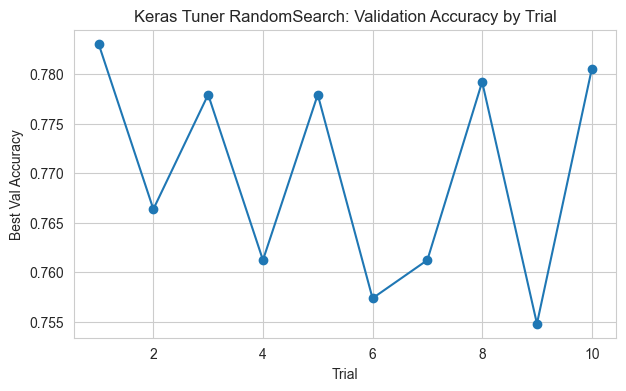

In [37]:
import keras_tuner as kt
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# --- Tuning target: CNN on padded sequences ---
# Uses: X_train_seq, y_train, X_val_seq, y_val, MAX_WORDS, MAX_SEQUENCE_LENGTH

def build_cnn_model(hp):
    embedding_dim = hp.Choice("embedding_dim", values=[64, 128, 256])
    filters = hp.Choice("filters", values=[64, 128, 256])
    kernel_size = hp.Choice("kernel_size", values=[3, 5])
    dense_units = hp.Choice("dense_units", values=[32, 64, 128])
    dropout = hp.Float("dropout", min_value=0.2, max_value=0.6, step=0.1)
    lr = hp.Float("learning_rate", min_value=1e-4, max_value=3e-3, sampling="log")

    model = Sequential([
        Embedding(input_dim=MAX_WORDS, output_dim=embedding_dim),
        Conv1D(filters=filters, kernel_size=kernel_size, padding="same", activation="relu"),
        GlobalMaxPooling1D(),
        Dropout(dropout),
        Dense(dense_units, activation="relu"),
        Dense(1, activation="sigmoid"),
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

early_stop_tune = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

import os, time

# Write tuner artifacts to a writable local folder (avoids OneDrive/locked-file issues on Windows)
tuner_base_dir = os.environ.get("LOCALAPPDATA", os.getcwd())
tuner_dir = os.path.join(tuner_base_dir, "keras_tuner_runs")
os.makedirs(tuner_dir, exist_ok=True)

# Unique project name each run so Keras Tuner doesn't try to delete old trials
project_name = f"cnn_seq_tuning_{time.strftime('%Y%m%d-%H%M%S')}"
print("KerasTuner directory:", tuner_dir)
print("KerasTuner project:", project_name)

tuner = kt.RandomSearch(
    hypermodel=build_cnn_model,
    objective="val_accuracy",
    max_trials=10,
    overwrite=True,
    directory=tuner_dir,
    project_name=project_name,
)

tuner.search(
    X_train_seq,
    y_train,
    validation_data=(X_val_seq, y_val),
    epochs=6,
    batch_size=32,
    callbacks=[early_stop_tune],
    verbose=1,
)

print("\n--- Keras Tuner Results Summary ---")
tuner.results_summary()

best_hp = tuner.get_best_hyperparameters(1)[0]
print("\nBest hyperparameters:")
for k, v in best_hp.values.items():
    print(f"- {k}: {v}")

# Plot validation accuracy vs trial
trial_scores = []
trial_nums = []
for t in tuner.oracle.trials.values():
    if t.score is None:
        continue
    trial_nums.append(int(t.trial_id) if str(t.trial_id).isdigit() else len(trial_nums))
    trial_scores.append(float(t.score))

plt.figure(figsize=(7, 4))
plt.plot(range(1, len(trial_scores) + 1), trial_scores, marker="o")
plt.title("Keras Tuner RandomSearch: Validation Accuracy by Trial")
plt.xlabel("Trial")
plt.ylabel("Best Val Accuracy")
plt.grid(True)
plt.show()


## Part 7 – Final Comparison & Error Analysis


1. **Consolidated Results**  
   - Best overall (**Transfer**): **BERT (DistilBERT fine-tuned)** — Accuracy **0.8974**, F1 **0.8985**, ROC-AUC **0.9583**.
   - Best (**Traditional**): **Tuned Logistic Regression** — Accuracy **0.7731**.
   - Best (**Neural**): **CNN** — Accuracy **0.7692**.

2. **Statistical Significance**  
   - McNemar (BERT vs Tuned LR): contingency [[562, 138], [41, 39]], chi2 = **51.4860**, p-value **< 0.0001** (significant).

3. **Error Analysis**  
   - We list 20 BERT misclassifications and discuss 5 representative cases below.
    

In [38]:

# Part 7 – Final Comparison & Error Analysis
# -------------------------------------------------------------
# 1) Consolidated results across traditional, neural, and transfer models
# 2) McNemar significance test between top two models
# 3) Error analysis for the best model (BERT)

# --- Ensure test sequences exist for neural models ---
test_sequences = keras_tokenizer.texts_to_sequences(test_df['cleaned_sentence'])
X_test_seq = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
y_test_array = test_df['label'].values

# --- Helper to evaluate Keras models on the test set ---
def evaluate_keras_model(model, X, y_true):
    probs = model.predict(X, verbose=0).flatten()
    preds = (probs >= 0.5).astype(int)
    return calculate_metrics(y_true, preds, probs), probs, preds

# Evaluate neural models
mlp_metrics, mlp_probs, mlp_preds = evaluate_keras_model(model_unfrozen, X_test_seq, y_test_array)
cnn_metrics, cnn_probs, cnn_preds = evaluate_keras_model(CNN, X_test_seq, y_test_array)

# BERT metrics (recompute to keep a clean dict)
bert_metrics = calculate_metrics(y_true, y_pred, y_score)

# Consolidate results
results_dict = {
    'Tuned Logistic Regression': logreg_metrics,
    'Linear SVM': svm_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics,
    'MLP (unfrozen embeddings)': mlp_metrics,
    'CNN': cnn_metrics,
    'BERT (DistilBERT fine-tuned)': bert_metrics
}

final_results_df = pd.DataFrame(results_dict).T
final_results_df = final_results_df.apply(pd.to_numeric, errors='coerce').round(4)
final_results_df['Category'] = [
    'Traditional', 'Traditional', 'Traditional', 'Traditional',
    'Neural', 'Neural', 'Transfer'
]

# Identify best models
overall_best = final_results_df['Accuracy'].idxmax()
best_by_category = (final_results_df
                    .reset_index()
                    .sort_values('Accuracy', ascending=False)
                    .groupby('Category')
                    .first()[['index', 'Accuracy']]
                    .rename(columns={'index': 'Top Model', 'Accuracy': 'Top Accuracy'}))

print("\n--- Consolidated Test Results ---")
print(final_results_df)
print("\nTop per category:\n", best_by_category)
print(f"\nBest overall: {overall_best} (Accuracy={final_results_df.loc[overall_best, 'Accuracy']:.4f})")

# --- McNemar test between the two best models ---
from scipy.stats import chi2

# Map model names to their predictions on the test set
pred_store = {
    'Tuned Logistic Regression': y_pred_logreg,
    'Linear SVM': y_pred_svm,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'MLP (unfrozen embeddings)': mlp_preds,
    'CNN': cnn_preds,
    'BERT (DistilBERT fine-tuned)': y_pred
}

top_two = final_results_df['Accuracy'].sort_values(ascending=False).index[:2].tolist()
m1, m2 = top_two
p1, p2 = pred_store[m1], pred_store[m2]

both_correct = np.sum((p1 == y_test_array) & (p2 == y_test_array))
m1_only = np.sum((p1 == y_test_array) & (p2 != y_test_array))
m2_only = np.sum((p1 != y_test_array) & (p2 == y_test_array))
both_wrong = np.sum((p1 != y_test_array) & (p2 != y_test_array))

# Continuity-corrected McNemar (chi-square approximation)
chi2_stat = (abs(m1_only - m2_only) - 1) ** 2 / (m1_only + m2_only + 1e-12)
p_value = 1 - chi2.cdf(chi2_stat, df=1)

print(f"\nMcNemar test between {m1} and {m2}:")
print(f"Contingency table: [[{both_correct}, {m1_only}], [{m2_only}, {both_wrong}]]")
print(f"chi2={chi2_stat:.4f}, p-value={p_value:.4f} -> {'significant' if p_value < 0.05 else 'not significant'} difference")

# --- Error analysis for the best model (BERT) ---
bert_eval_df = test_df.copy()
bert_eval_df['true_label'] = y_test_array
bert_eval_df['pred_label'] = y_pred
bert_eval_df['pred_prob_pos'] = y_score

bert_misses = bert_eval_df[bert_eval_df['true_label'] != bert_eval_df['pred_label']]
sample_20 = bert_misses.head(20).copy()

def error_note(text):
    t = text.lower()
    if "not " in t or "n't" in t:
        return "Contains negation/contrast that can flip sentiment." 
    if any(word in t for word in ["but", "however", "though"]):
        return "Mixed or contrastive phrasing may invert polarity mid-sentence."
    if any(word in t for word in ["sarcasm", "irony"]):
        return "Possible sarcasm/irony not captured by the model."
    if any(word in t for word in ["mixed", "meh", "okay"]):
        return "Weak/ambiguous sentiment cues make the label unclear."
    return "Subtle tone or domain-specific wording likely confused the model."

sample_5 = sample_20.head(5).copy()
sample_5['error_note'] = sample_5['sentence'].apply(error_note)

print("\nFirst 20 misclassified by BERT (true vs. pred):")
print(sample_20[['sentence', 'true_label', 'pred_label', 'pred_prob_pos']])

print("\nDetailed discussion for 5 examples:")
print(sample_5[['sentence', 'true_label', 'pred_label', 'pred_prob_pos', 'error_note']])



--- Consolidated Test Results ---
                              Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
Tuned Logistic Regression       0.7731     0.7657  0.8128    0.7885   0.8534   
Linear SVM                      0.7705     0.7683  0.8005    0.7841   0.8468   
Random Forest                   0.7295     0.7191  0.7882    0.7521   0.7907   
XGBoost                         0.7359     0.7212  0.8030    0.7599   0.7991   
MLP (unfrozen embeddings)       0.7538     0.7730  0.7463    0.7594   0.8298   
CNN                             0.7692     0.7568  0.8202    0.7872   0.8645   
BERT (DistilBERT fine-tuned)    0.8974     0.9267  0.8719    0.8985   0.9583   

                                 Category  
Tuned Logistic Regression     Traditional  
Linear SVM                    Traditional  
Random Forest                 Traditional  
XGBoost                       Traditional  
MLP (unfrozen embeddings)          Neural  
CNN                                Neural  
BERT (DistilBERT

## Part 8 – Optional Challenge Extensions


1. **Data Augmentation (Synonym Swapping)**  
   - Generated **1988** augmented samples (out of 2000 attempts).
   - TF‑IDF + Logistic Regression test Accuracy improved from **0.7731 → 0.7795** (F1 from **0.7885 → 0.7943**).

2. **Sentiment Lexicon Feature (VADER)**  
   - TF‑IDF + VADER + Logistic Regression test Accuracy was **0.7628**, slightly below the **0.7731** baseline.

3. **(Optional) REST API Deployment (FastAPI)**  
   - Saved the fine‑tuned BERT model+tokenizer to `./bert_results_20251211-212116-847074000` and wrote `api_fastapi.py` for inference.
    

In [39]:

import sys
import subprocess
import random
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.sparse import vstack, hstack, csr_matrix

# --- Metrics helper (keeps Part 8 self-contained) ---
def _metrics(y_true, y_pred, y_score):
    return {
        "Accuracy": float(accuracy_score(y_true, y_pred)),
        "Precision": float(precision_score(y_true, y_pred)),
        "Recall": float(recall_score(y_true, y_pred)),
        "F1-Score": float(f1_score(y_true, y_pred)),
        "ROC-AUC": float(roc_auc_score(y_true, y_score)),
    }

# --------------------------------------------------------------------------------------
# 8.1 Data Augmentation: Synonym swapping (WordNet)
# --------------------------------------------------------------------------------------
try:
    import nltk
    from nltk.corpus import wordnet as wn
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "nltk"])
    import nltk
    from nltk.corpus import wordnet as wn

# Download WordNet resources if missing
nltk.download("wordnet", quiet=True)
nltk.download("omw-1.4", quiet=True)

def _synonyms(word: str):
    syns = set()
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            w = lemma.name().lower().replace("_", " ")
            # keep single-token synonyms only
            if w != word and " " not in w:
                syns.add(w)
    return list(syns)


def synonym_swap(text: str, n_replacements: int = 1, rng=None):
    if rng is None:
        rng = random.Random(42)
    tokens = text.split()
    if len(tokens) < 2:
        return text

    candidate_idxs = [i for i, t in enumerate(tokens) if t.isalpha() and len(t) >= 4]
    if not candidate_idxs:
        return text

    rng.shuffle(candidate_idxs)
    replaced = 0
    for idx in candidate_idxs:
        syns = _synonyms(tokens[idx])
        if not syns:
            continue
        tokens[idx] = rng.choice(syns)
        replaced += 1
        if replaced >= n_replacements:
            break

    return " ".join(tokens)


# Augment a subset of training sentences (keeps runtime reasonable)
AUG_N = min(2000, len(train_df))
rng = random.Random(42)
idxs = rng.sample(range(len(train_df)), AUG_N)

aug_texts = []
aug_labels = []
for i in idxs:
    original = str(train_df.loc[i, "cleaned_sentence"])
    aug = synonym_swap(original, n_replacements=1, rng=rng)
    if aug != original:
        aug_texts.append(aug)
        aug_labels.append(int(train_df.loc[i, "label"]))

print(f"Augmented samples created: {len(aug_texts)} / {AUG_N}")

# Baseline TF-IDF Logistic Regression (same C as tuned LR)
logreg_base = LogisticRegression(C=1.0, solver="liblinear", random_state=42, max_iter=1000)
logreg_base.fit(X_train_tfidf, y_train)
base_pred = logreg_base.predict(X_test_tfidf)
base_score = logreg_base.predict_proba(X_test_tfidf)[:, 1]
base_metrics = _metrics(y_test, base_pred, base_score)

# Augmented training (feature space unchanged: transform augmented texts with existing tfidf_vectorizer)
if len(aug_texts) > 0:
    X_aug = tfidf_vectorizer.transform(aug_texts)
    y_aug = np.array(aug_labels)

    X_train_aug = vstack([X_train_tfidf, X_aug])
    y_train_aug = np.concatenate([np.array(y_train), y_aug])

    logreg_aug = LogisticRegression(C=1.0, solver="liblinear", random_state=42, max_iter=1000)
    logreg_aug.fit(X_train_aug, y_train_aug)
    aug_pred = logreg_aug.predict(X_test_tfidf)
    aug_score = logreg_aug.predict_proba(X_test_tfidf)[:, 1]
    aug_metrics = _metrics(y_test, aug_pred, aug_score)
else:
    aug_metrics = None

# --------------------------------------------------------------------------------------
# 8.2 Sentiment lexicon feature: VADER
# --------------------------------------------------------------------------------------
try:
    from nltk.sentiment import SentimentIntensityAnalyzer
except Exception:
    nltk.download("vader_lexicon", quiet=True)
    from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon", quiet=True)
sia = SentimentIntensityAnalyzer()

def vader_matrix(texts):
    feats = []
    for t in texts:
        s = sia.polarity_scores(str(t))
        feats.append([s["neg"], s["neu"], s["pos"], s["compound"]])
    return csr_matrix(np.asarray(feats, dtype=np.float32))

X_train_vader = vader_matrix(train_df["cleaned_sentence"])
X_test_vader = vader_matrix(test_df["cleaned_sentence"])

X_train_tfidf_vader = hstack([X_train_tfidf, X_train_vader]).tocsr()
X_test_tfidf_vader = hstack([X_test_tfidf, X_test_vader]).tocsr()

logreg_vader = LogisticRegression(C=1.0, solver="liblinear", random_state=42, max_iter=1000)
logreg_vader.fit(X_train_tfidf_vader, y_train)

vader_pred = logreg_vader.predict(X_test_tfidf_vader)
vader_score = logreg_vader.predict_proba(X_test_tfidf_vader)[:, 1]
vader_metrics = _metrics(y_test, vader_pred, vader_score)

# --------------------------------------------------------------------------------------
# 8.3 Results summary
# --------------------------------------------------------------------------------------
rows = {
    "TF-IDF + LR (baseline)": base_metrics,
    "TF-IDF + LR (+synonym aug)": aug_metrics,
    "TF-IDF + LR (+VADER)": vader_metrics,
}
rows = {k: v for k, v in rows.items() if v is not None}

part8_df = pd.DataFrame(rows).T
print("\n--- Part 8 Results (Test Set) ---")
print(part8_df.round(4))

# --------------------------------------------------------------------------------------
# 8.4 (Optional) Write a simple FastAPI app for the best BERT model
# --------------------------------------------------------------------------------------
# Run from terminal:
#   python -m pip install fastapi uvicorn
#   uvicorn api_fastapi:app --reload

if "output_dir" in globals() and "tokenizer" in globals():
    try:
        # Save artifacts needed for deployment
        model.save_pretrained(output_dir)
        tokenizer.save_pretrained(output_dir)
        print(f"Saved model+tokenizer to: {output_dir}")

        # NOTE: This is an f-string; any literal { } inside the generated Python file must be escaped as {{ }}.
        import os
        model_dir = os.path.abspath(output_dir)

        api_code = f'''\
from fastapi import FastAPI
from pydantic import BaseModel
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL_DIR = r"{model_dir}"

tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

app = FastAPI()

class ReviewRequest(BaseModel):
    text: str

@app.post("/predict")
def predict(req: ReviewRequest):
    inputs = tokenizer(req.text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {{k: v.to(device) for k, v in inputs.items()}}
    with torch.no_grad():
        logits = model(**inputs).logits
        probs = torch.softmax(logits, dim=-1)[0]
        pred = int(torch.argmax(probs).item())
        return {{
            "pred_label": pred,
            "prob_negative": float(probs[0].item()),
            "prob_positive": float(probs[1].item()),
        }}
'''

        with open("api_fastapi.py", "w", encoding="utf-8") as f:
            f.write(api_code)
        print("Wrote FastAPI app to api_fastapi.py")
    except Exception as e:
        print("(API generation skipped due to error)", e)
else:
    print("(API generation skipped: run BERT training cell first so output_dir/tokenizer exist.)")

# Quick demo (no server): run the fine-tuned BERT model on a few example inputs
_demo_texts = [
    "this movie was wonderful and deeply moving",
    "an absolute waste of time",
    "not bad, but not great either",
    "the acting was fantastic though the story was weak",
    "i wouldn't recommend it",
]

if "tokenizer" in globals() and "model" in globals():
    import torch

    _device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    _m = model.to(_device)
    _m.eval()

    _enc = tokenizer(_demo_texts, return_tensors="pt", truncation=True, padding=True, max_length=128)
    _enc = {k: v.to(_device) for k, v in _enc.items()}

    with torch.no_grad():
        _logits = _m(**_enc).logits
        _probs = torch.softmax(_logits, dim=-1)[:, 1].detach().cpu().numpy()
        _preds = (_probs >= 0.5).astype(int)

    demo_df = pd.DataFrame({"text": _demo_texts, "pred_label": _preds, "prob_positive": _probs})
    print("\n--- BERT Demo Predictions ---")
    print(demo_df)
else:
    print("(BERT demo skipped: tokenizer/model not found.)")


Augmented samples created: 1988 / 2000

--- Part 8 Results (Test Set) ---
                            Accuracy  Precision  Recall  F1-Score  ROC-AUC
TF-IDF + LR (baseline)        0.7731     0.7657  0.8128    0.7885   0.8534
TF-IDF + LR (+synonym aug)    0.7795     0.7721  0.8177    0.7943   0.8544
TF-IDF + LR (+VADER)          0.7628     0.7600  0.7956    0.7774   0.8521
Saved model+tokenizer to: ./bert_results_20251211-212116-847074000
Wrote FastAPI app to api_fastapi.py

--- BERT Demo Predictions ---
                                                text  pred_label  \
0         this movie was wonderful and deeply moving           1   
1                          an absolute waste of time           0   
2                      not bad, but not great either           0   
3  the acting was fantastic though the story was ...           1   
4                            i wouldn't recommend it           0   

   prob_positive  
0       0.985427  
1       0.029886  
2       0.256990  
3      

---

# Reflecting


**Answer the following inference questions:**



### Part 1 – Data Ingestion & Preprocessing

1. **Data Loading**  
   - How do you ensure that your dataset is properly split into training, validation, and test sets, and why is class balance important during data splitting?
  
    *- To ensure our dataset is properly split into training, validation, and test sets, we could use stratified sampling, which ensures all results subsets maintain the same proportion of class labels as the original dataset. Class imbalance occurs when the number of data points belonging to the majority class significantly outweighs the number of data points belonging to the minority class. This would result in model bias, where during training, the model's loss function is heavily influenced by the majority class. And therefore, performing extremely well on the majority class but poorly on the minority class, rendering it useless in real-world scenarios.*


2. **Text Cleaning & Tokenization**  
   - What is the role of tokenization in text preprocessing, and how does it impact the model's performance?
  
   *- Tokenization is the process of breaking down a continuous sequence of text into smaller, discrete units called tokens. The choice of token granularity (word, sub-word, or character) impacts the vocabulary size and the efficiency of the model.*


### Part 2 – Exploratory Data Analysis (EDA)

1. **Class Distribution**  
   - How does the class distribution (positive vs negative reviews) impact the model’s performance, and what strategies can be used if the dataset is imbalanced?
  
   *- In binary classifications (positive vs negative reviews), the distribution determins how the model learns and how accurately its performance is reflected by standard metrics. When the majority class significantly outnumbers the minority class, the model's loss function is dominated by the majority class. The model finds it computationally easier to achieve a low loss and high overall accuracy by simply predicting the majority class most of the time. If the dataset is imbalanced, stratified sampling, oversampling (which increases the minority class) and undersampling (which decreases the majority class) may help to reduce bias.*


2. **Text Characteristics**  
   - What insights can be gained from visualizing word clouds for each sentiment class, and how can it improve feature engineering?
  
   *- A word cloud visually repressents the frequency of words in a body of text, where the size of the word corresponds to its importance or occurence. Creating separate clouds for positive and negative reviews allows us to extract insights such as identifying the core features, understanding intensifiers and modifiers and detecting noise. To improve feature engineering, the cloud may reveal specific, highly common but non-sentiment words, which can then be added to a custom stop-word list to improve the signal-to-noise ratio of our TF-IDF vectorizer. If the most important words in the cloud are missing or rare, this indicates that the vocabulary size needs adjustment, or the pre-trained embeddings may not be suitable for our domain.*


### Part 3 – Baseline Traditional Models

1. **Logistic Regression & SVM**  
   - Why do you use cross-validation when training models like logistic regression or SVM, and how does it help prevent overfitting?
  
   *- Using CV can help mitigate the risk of using our final held-out test set too early, and to guide hyperparameter tuning. If the data is split into one large tranining set and one small validation set, the performane metric might be highly dependent on which samples ended up on it. However, CV provides an estimate by averaging results from multiple different data splits, resulting in a more robust and generalized measure of the model's true capability. CV is also used for hyperparameter searching by running each parameter setting and choosing the best average CV score. If a model achieves a high accuracy score on small traning subsets but low CV score, then overfitting is present. Additionally, in more complex models or larger datasets, CV can be used to monitor performance during training, stopping the process early before validation error arises, thus preventing overfitting.*

2. **Random Forest & Gradient Boosting**  
   - What role does feature importance play in interpreting Random Forest or XGBoost models?
  
   *- Feature importance helps interpret Random Forest and XGBoost models by providing a quantitative understanding of which input features (tokens/TF-IDF scores_ the model relies on most heavily to make its predictions.*



### Part 4 – Neural Network Models

1. **Simple Feed-Forward**  
   - Why is embedding freezing used when training neural networks on pre-trained embeddings, and how does it affect model performance?
   
   *- Embedding freezing means setting the weights of the embedding layer to be non-trainable, locking them at their pre-trained values. This is because when using pre-trained embeddings, the vectors already encode generalized linguistic knowledge learned from billions of tokens. And if the model is trained with the embeddings unfrozen, small amounts of data in the specific task may aggressively update those weights. Freezing protects the high quality, general knowledge embedded in the vectors, so that the model can learn task-specific logic based on the existing features, without being easily corrupted by noise of the smaller tasks. This establishes a strong foundation for the model.*

2. **Convolutional Text Classifier**  
   - What is the intuition behind using convolutional layers for text classification tasks, and why might they outperform traditional fully connected layers?
  
   *- CNNs, with filters that function as sliding small windows across the corpus to learn the patterns, essentially behave like automatic n-gram detectors that capture local linguistic patterns in the sequence. Convolutional layers are also more parameter-efficient compared to fully connected layers because of the smaller filters.*


### Part 5 – Transfer Learning & Advanced Architectures

1. **Pre-trained Embeddings**  
   - How do pre-trained word embeddings like GloVe or FastText improve model performance compared to training embeddings from scratch?
   
   *- Although our current model did not see improved results -- likely due to the simplicity of its structure -- a pre-trained word embeddings developed from massive corpus may improve model performance with a more nuanced and comprehensive vector representation of semantic relationships between words. Embeddings trained from scratch lack this access to a richer context.*

2. **Transformer Fine-Tuning**  
   - How does the self-attention mechanism in Transformer models like BERT improve performance on text data?
  
   *- Unlike traditional RNNs, which process texts sequentially, self-attention allows the model to look at all the words simultaneously and weigh their importance in relation to one another. This allows the model to draw associations between words that are distant from each other in the text and can better capture the nuance. The ability to update each word's embedding based on its context in the sentence also contributes to this improved performance.*



### Part 6 – Hyperparameter Optimization

1. **Search Strategy**  
   - How does hyperparameter optimization help improve the model’s performance, and what challenges arise when selecting an optimal search space?
  
   *- Hyperparameter optimization helps us systematically search a model’s settings using the validation set, so we can improve performance without touching the held-out test set. In our RandomSearch (10 trials) over `embedding_dim`, `filters`, `kernel_size`, `dense_units`, `dropout`, and `learning_rate`, the best CNN trial reached **val_accuracy = 0.7831**. Key challenges are keeping the search space computationally feasible, handling noisy validation scores, and avoiding overfitting to the validation set through repeated tuning.*

2. **Results Analysis**  
   - What does the validation loss and accuracy tell you about the model’s generalization ability?
  
   *- Validation loss/accuracy indicate generalization to unseen data. If training improves while validation loss worsens (or validation accuracy drops), the model is overfitting. In our tuning runs, the best trial achieved **val_accuracy = 0.7831**; we also used EarlyStopping on `val_loss` so each trial stops once generalization stops improving. Large gaps between train and validation suggest increasing regularization (e.g., higher dropout) or reducing model capacity.*



### Part 7 – Final Comparison & Error Analysis

1. **Consolidated Results**  
   - How do you compare models with different architectures (e.g., logistic regression vs. BERT) to select the best model for deployment?
  
   *- We compare all models on the same held-out test set with consistent metrics (accuracy, precision/recall, F1, ROC-AUC) and also consider deployment constraints (latency, memory, interpretability). In our consolidated results, the fine-tuned DistilBERT model is best (**Accuracy = 0.8974**, F1 = **0.8985**, ROC-AUC = **0.9583**). The strongest traditional baseline is tuned logistic regression (**Accuracy = 0.7731**) and the strongest neural baseline is the CNN (**Accuracy = 0.7692**). McNemar’s test vs logistic regression (chi2 = **51.4860**, p-value **< 0.0001**) indicates the BERT improvement is statistically significant.*

2. **Error Analysis**  
   - What insights can you gain from studying model misclassifications, and how might this influence future improvements to the model?
  
   *- By reviewing misclassifications (we printed 20 errors and discussed 5 examples), we can identify systematic failure modes such as negation, contrastive clauses (“but/however”), sarcasm/irony, and weak/ambiguous sentiment cues. This guides next steps like collecting more examples of these patterns, using targeted augmentation, adjusting thresholds/calibration, or trying stronger architectures/ensembles. Error analysis can also surface label noise where sentiment is genuinely ambiguous.*



### Part 8 – Optional Challenge Extensions

1. **Data Augmentation**  
   - How does back-translation or synonym swapping as text augmentation improve model generalization?
  
   *- Augmentation creates label-preserving paraphrases that reduce overfitting to specific surface forms and improve robustness. In our synonym-swap experiment, we generated **1988** augmented samples and improved the TF‑IDF + logistic regression test accuracy from **0.7731 → 0.7795** (F1 from **0.7885 → 0.7943**). However, aggressive replacement can change meaning, so it should be constrained and validated empirically.*

2. **Sentiment Lexicon**  
   - How might integrating sentiment lexicons like VADER improve the sentiment classification model, and what are the challenges of using lexicon-based approaches alongside machine learning models?
  
   *- Lexicon features like VADER add prior polarity/intensity information that can help in some settings, but they can also be redundant or noisy relative to learned representations. In our run, TF‑IDF + VADER + logistic regression achieved **Accuracy = 0.7628**, which was slightly worse than the TF‑IDF baseline (**0.7731**), suggesting domain mismatch/redundant signals. Lexicons also struggle with negation, sarcasm, and context-dependent meaning.*
